In [15]:
import pandas as pd
import numpy as np

import collections

import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')

import yaml

Ind_power = pd.read_csv("/Users/liqunp/Dropbox (Princeton)/Work/Switch_2020_slow_Ind_SA5_new/Energy_from_He_Test/outputs/dispatch_zonal_annual_summary.csv")
RE_power = pd.read_csv("/Users/liqunp/Dropbox (Princeton)/Work/Switch_2020_slow_RE_SA5_new/Energy_from_He_Test/outputs/dispatch_zonal_annual_summary.csv")
Demand_power = pd.read_csv("/Users/liqunp/Dropbox (Princeton)/Work/Switch_2020_slow_Demand_SA5_new/Energy_from_He_Test/outputs/dispatch_zonal_annual_summary.csv")
selec_Ind = Ind_power.loc [Ind_power['period'] == 2038]
selec_RE = RE_power.loc [RE_power['period'] == 2038]
selec_Demand = Demand_power.loc [Demand_power['period'] == 2038]

selec_Ind = selec_Ind.loc [Ind_power['gen_load_zone'] == 'Chongqing']
selec_RE = selec_RE.loc [RE_power['gen_load_zone'] == 'Chongqing']
selec_Demand = selec_Demand.loc [Demand_power['gen_load_zone'] == 'Chongqing']


,gen_tech,gen_load_zone,gen_energy_source,period,Energy_GWh_typical_yr,VariableCost_per_yr,DispatchEmissions_tCO2_per_typical_yr
15,Battery_Storage,Chongqing,Storage,2038,22915.617584,9.166247e+06,0.000000e+00
207,Central_PV,Chongqing,Solar,2038,0.000000,0.000000e+00,0.000000e+00
654,Coal_1000_OT,Chongqing,Coal,2038,10507.430973,3.152229e+07,7.908918e+06
726,Coal_1000_OT_CCS,Chongqing,Coal_CCS,2038,0.000000,0.000000e+00,0.000000e+00
798,Coal_1000_RC,Chongqing,Coal,2038,0.000000,0.000000e+00,0.000000e+00
978,Coal_1000_RC_CCS,Chongqing,Coal_CCS,2038,0.000000,0.000000e+00,0.000000e+00
1596,Coal_300_OT,Chongqing,Coal,2038,0.000000,0.000000e+00,0.000000e+00
1668,Coal_300_OT_CCS,Chongqing,Coal_CCS,2038,0.000000,0.000000e+00,0.000000e+00
1740,Coal_300_RC,Chongqing,Coal,2038,0.000000,0.000000e+00,0.000000e+00
1920,Coal_300_RC_CCS,Chongqing,Coal_CCS,2038,0.000000,0.000000e+00,0.000000e+00


In [16]:
result_Ind = selec_Ind.groupby([
    pd.Grouper('gen_energy_source')
]).sum()
selec_Ind = result_Ind[['Energy_GWh_typical_yr']]

result_RE = selec_RE.groupby([
    pd.Grouper('gen_energy_source')
]).sum()
selec_RE = result_RE[['Energy_GWh_typical_yr']]

result_Demand = selec_Demand.groupby([
    pd.Grouper('gen_energy_source')
]).sum()
selec_Demand = result_Demand[['Energy_GWh_typical_yr']]

sources = ['Coal','Coal_CCS', 'Gas','Gas_CCS','Uranium','Water','Solar','Wind','Storage']
provs = [ 'Chongqing',  'Hunan', 'West_Inner_Mongolia']
# new df

filled_power = pd.DataFrame(index=sources)
filled_power["Ind_Energy_GWh"] = 0
filled_power["RE_Energy_GWh"] = 0
filled_power["Demand_Energy_GWh"] = 0



,Energy_GWh_typical_yr
gen_energy_source,
Coal,53722.139410
Coal_CCS,0.000000
Gas,0.000000
Gas_CCS,0.000000
Solar,0.000000
Storage,3244.703804
Uranium,0.000000
Water,29473.963442
Wind,11696.386848


In [17]:
for source in sources:
    filled_power.loc[source, "Ind_Energy_GWh"] = result_Ind.loc[source, "Energy_GWh_typical_yr"]/1000
    filled_power.loc[source, "RE_Energy_GWh"] = result_RE.loc[source, "Energy_GWh_typical_yr"]/1000
    filled_power.loc[source, "Demand_Energy_GWh"] = result_Demand.loc[source, "Energy_GWh_typical_yr"]/1000

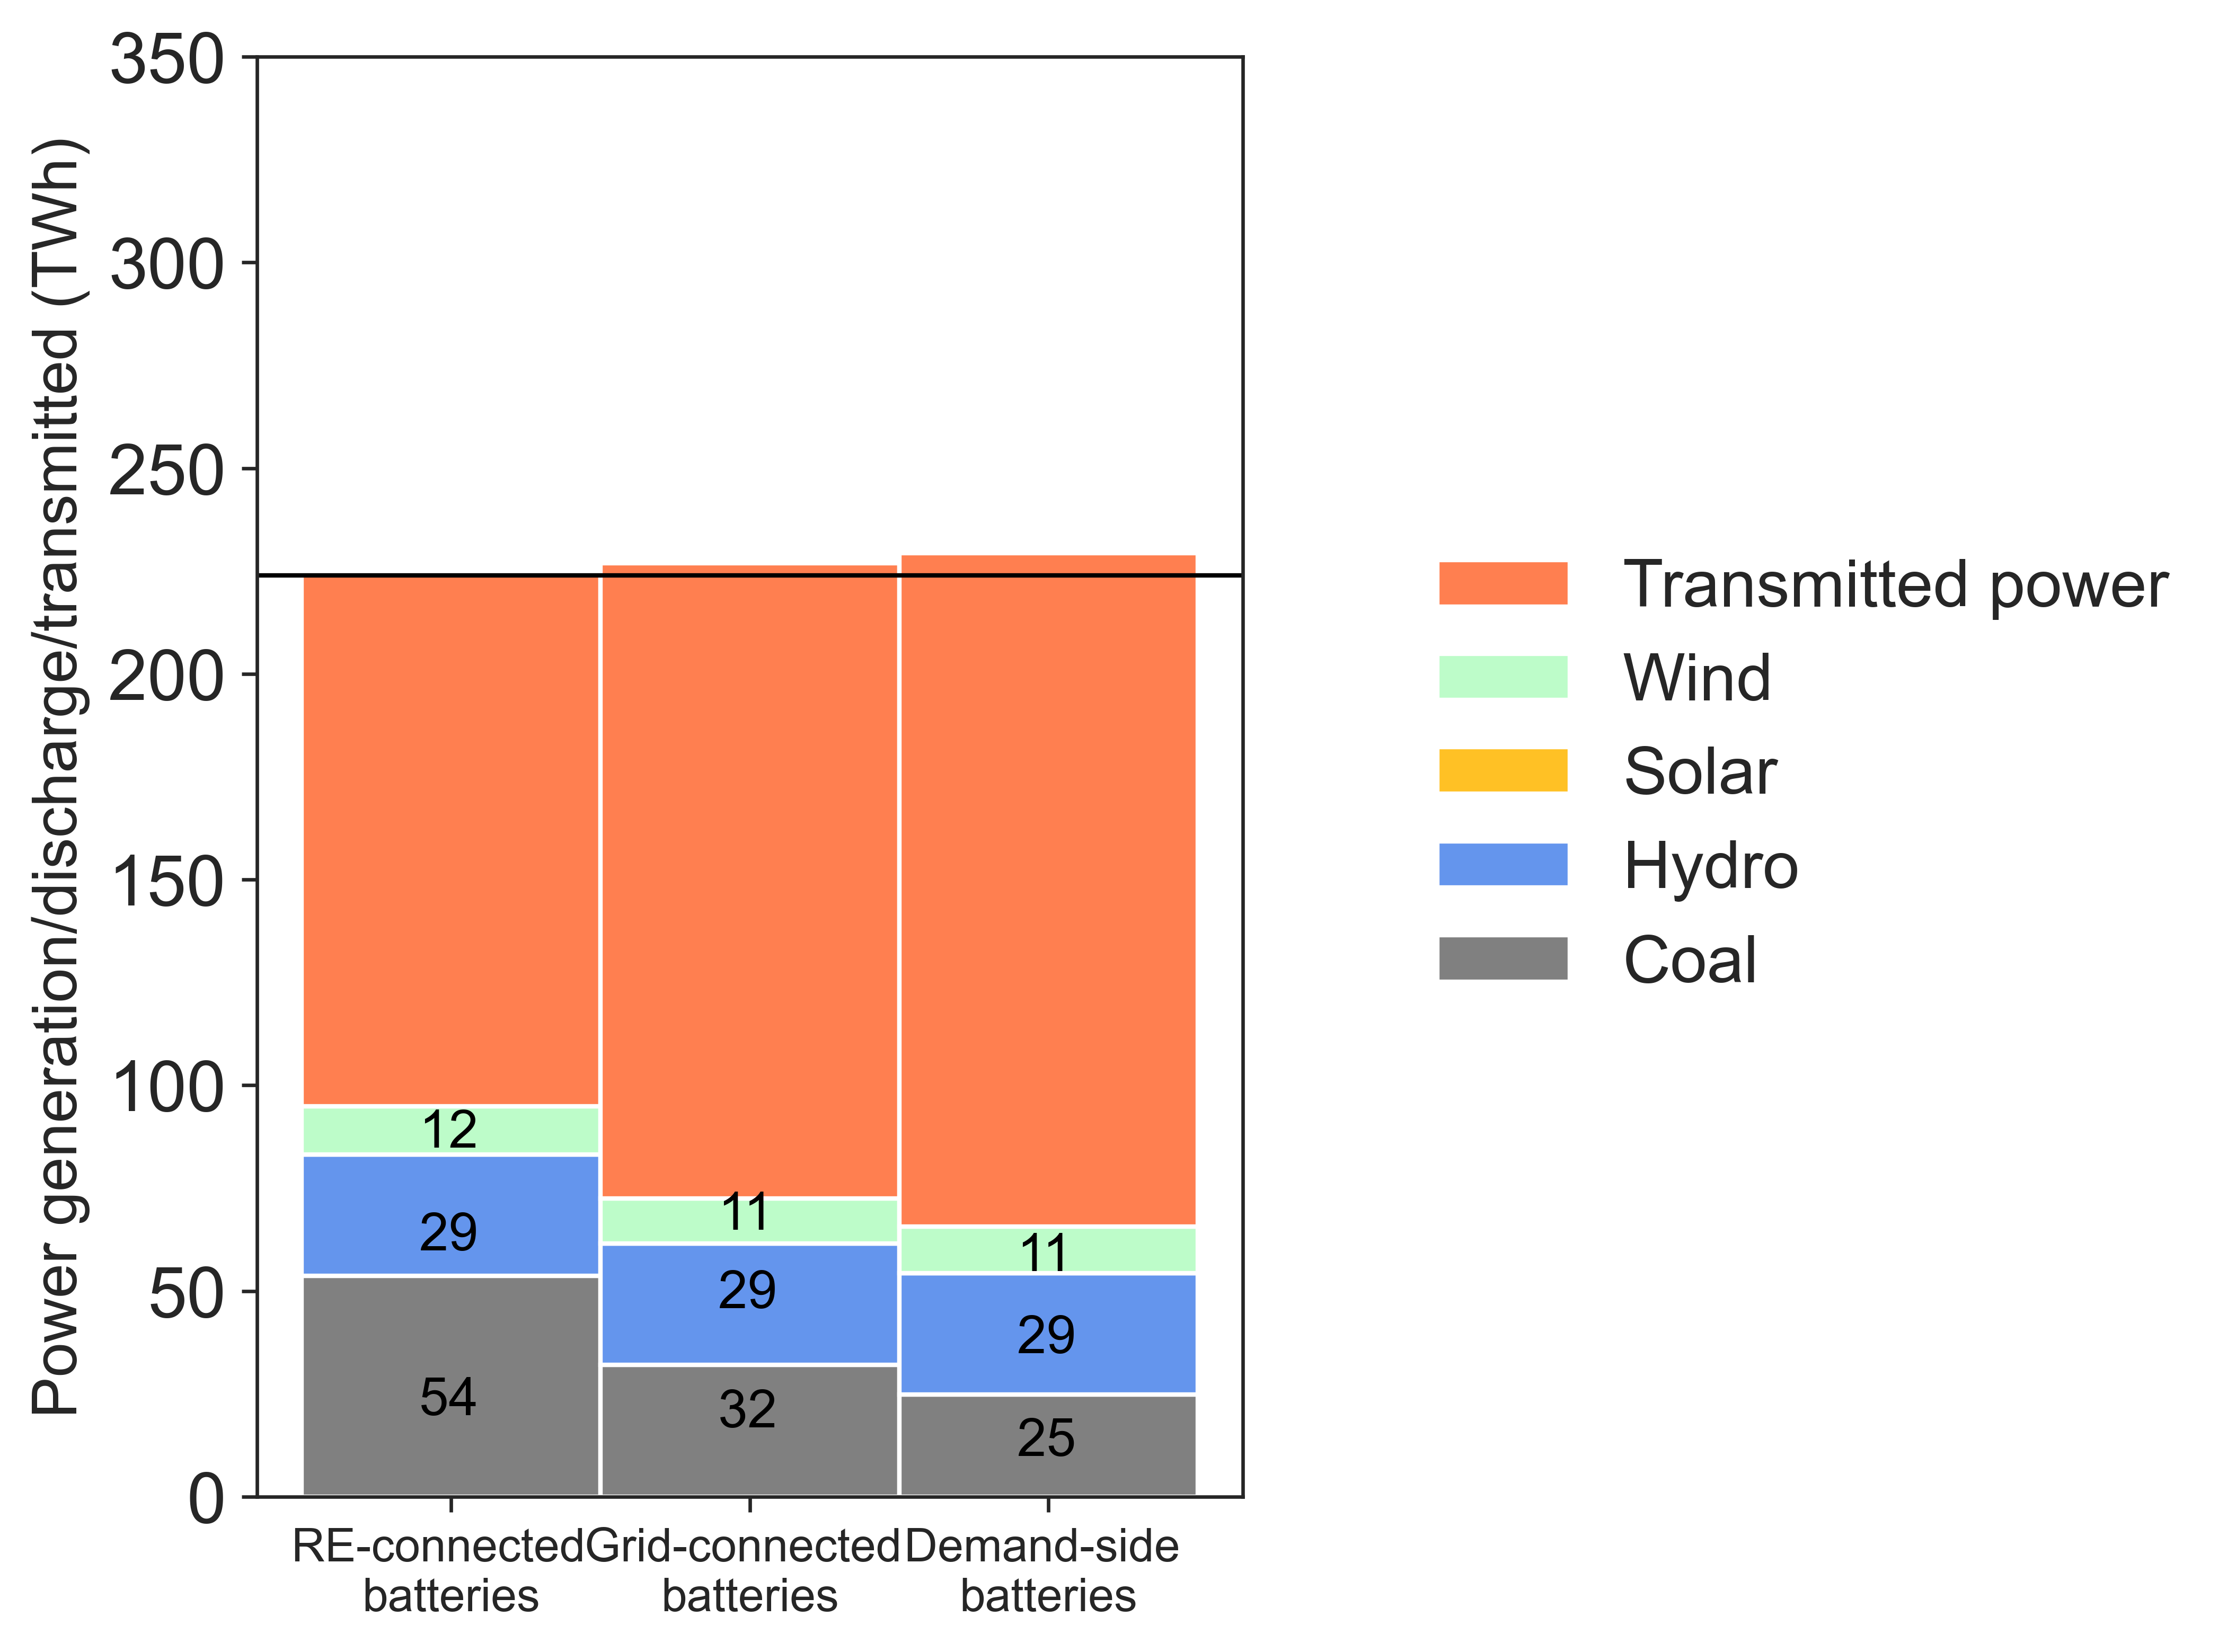

In [29]:
colors = ['k','grey', 'peachpuff', 'pink', 'chocolate', 'deepskyblue', 'gold','mediumseagreen','purple']
labels = ['Coal', 'Coal_CCS','Gas', 'Gas_CCS','Nuclear','Hydro','Solar','Wind','Batteries']
r = [0,1,2]
Scen = ['RE-connected  \nbatteries', 'Grid-connected \nbatteries',  'Demand-side \nbatteries']

gencap = filled_power.values

Coal = [gencap[0,1], gencap[0,0], gencap[0,2]]
Nuclear = [gencap[4,1], gencap[4,0], gencap[4,2]]
Hydro = [gencap[5,1], gencap[5,0], gencap[5,2]]
Solar = [gencap[6,1], gencap[6,0], gencap[6,2]]
Wind = [gencap[7,1], gencap[7,0], gencap[7,2]]

# Storage = [gencap[8,1], gencap[8,0], gencap[8,2]]

Transmitted_power = [129.2,154.4,163.7] #2040
#
barWidth = 1

bars_nuclear = np.add(Coal, Nuclear).tolist ()
bars_hydro = np.add(bars_nuclear, Hydro).tolist ()
bars_solar = np.add(bars_hydro, Solar).tolist ()
bars_wind = np.add(bars_solar, Wind).tolist ()
bars_storage = np.add(bars_wind, Storage).tolist ()
bars_trans = np.add(bars_wind, Transmitted_power).tolist ()


fig = plt.figure(figsize=(4, 6), dpi=600)
plt.bar(r, Coal, color='grey', edgecolor='white', width=barWidth, label = 'Coal')
plt.bar(r, Hydro, bottom=Coal, color='#6495ED', edgecolor='white', width=barWidth, label = 'Hydro')
plt.bar(r, Solar, bottom=bars_hydro, color='#FFC125', edgecolor='white', width=barWidth, label = 'Solar')
plt.bar(r, Wind, bottom=bars_solar, color='#BDFCC9', edgecolor='white', width=barWidth, label = 'Wind')
# plt.bar(r, Storage, bottom=bars_wind, color='blueviolet', edgecolor='white', width=barWidth, label = 'Battery discharge')
plt.bar(r, Transmitted_power, bottom=bars_wind, color='#FF7F50', edgecolor='white', width=barWidth, label = 'Transmitted power')



plt.yticks(fontname = 'Arial', size =16 )
plt.xticks (r, Scen, fontname = 'Arial', size =10.5)
plt.ylim(0,350)


current_handles, current_labels = plt.gca().get_legend_handles_labels()
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))
plt.legend (reversed_handles, reversed_labels, frameon=False, bbox_to_anchor=(2, 0.5),loc = 'right', ncol=1, fontsize= 15) 
plt.ylabel('Dispatched electricity(TWh)', size = 14, fontname = 'Arial') 

plt.text(-0.5, 20, '{:10.0f}'.format(gencap[0,1]), fontsize=12, color='black')
plt.text(-0.5, 60, '{:10.0f}'.format(gencap[5,1]), fontsize=12, color='black')
plt.text(-0.5, 85, '{:10.0f}'.format(gencap[7,1]), fontsize=12, color='black')

plt.text(0.5, 17, '{:10.0f}'.format(gencap[0,0]), fontsize=12, color='black')
plt.text(0.5, 46, '{:10.0f}'.format(gencap[5,0]), fontsize=12, color='black')
plt.text(0.5, 65, '{:10.0f}'.format(gencap[7,0]), fontsize=12, color='black')


plt.text(1.5, 10, '{:10.0f}'.format(gencap[0,2]), fontsize=12, color='black')
plt.text(1.5, 35, '{:10.0f}'.format(gencap[5,2]), fontsize=12, color='black')
plt.text(1.5, 55, '{:10.0f}'.format(gencap[7,2]), fontsize=12, color='black')


plt.axhline(y = 224, color = 'black',lw=1)  #2040

fig.savefig("/Users/liqunp/Desktop/2050.pdf", bbox_inches='tight')

In [31]:
Ind_power = pd.read_csv("/Users/liqunp/Dropbox (Princeton)/Work/Switch_2020_slow_Ind_SA5_new/Energy_from_He_Test/outputs/dispatch_zonal_annual_summary.csv")
RE_power = pd.read_csv("/Users/liqunp/Dropbox (Princeton)/Work/Switch_2020_slow_RE_SA5_new/Energy_from_He_Test/outputs/dispatch_zonal_annual_summary.csv")
Demand_power = pd.read_csv("/Users/liqunp/Dropbox (Princeton)/Work/Switch_2020_slow_Demand_SA5_new/Energy_from_He_Test/outputs/dispatch_zonal_annual_summary.csv")
selec_Ind = Ind_power.loc [Ind_power['period'] == 2038]
selec_RE = RE_power.loc [RE_power['period'] == 2038]
selec_Demand = Demand_power.loc [Demand_power['period'] == 2038]

selec_Ind = selec_Ind.loc [Ind_power['gen_load_zone'] == 'West_Inner_Mongolia']
selec_RE = selec_RE.loc [RE_power['gen_load_zone'] == 'West_Inner_Mongolia']
selec_Demand = selec_Demand.loc [Demand_power['gen_load_zone'] == 'West_Inner_Mongolia']

result_Ind = selec_Ind.groupby([
    pd.Grouper('gen_energy_source')
]).sum()
selec_Ind = result_Ind[['Energy_GWh_typical_yr']]

result_RE = selec_RE.groupby([
    pd.Grouper('gen_energy_source')
]).sum()
selec_RE = result_RE[['Energy_GWh_typical_yr']]

result_Demand = selec_Demand.groupby([
    pd.Grouper('gen_energy_source')
]).sum()
selec_Demand = result_Demand[['Energy_GWh_typical_yr']]

sources = ['Coal','Coal_CCS', 'Gas','Gas_CCS','Uranium','Water','Solar','Wind','Storage']
# provs = [ 'Chongqing',  'Hunan', 'West_Inner_Mongolia']
# new df

filled_power = pd.DataFrame(index=sources)
# filled_power = pd.DataFrame(
#     index=pd.MultiIndex.from_product(sources, names=('gen_energy_source'))
filled_power["Ind_Energy_GWh"] = 0
filled_power["RE_Energy_GWh"] = 0
filled_power["Demand_Energy_GWh"] = 0

for source in sources:
    filled_power.loc[source, "Ind_Energy_GWh"] = result_Ind.loc[source, "Energy_GWh_typical_yr"]/1000
    filled_power.loc[source, "RE_Energy_GWh"] = result_RE.loc[source, "Energy_GWh_typical_yr"]/1000
    filled_power.loc[source, "Demand_Energy_GWh"] = result_Demand.loc[source, "Energy_GWh_typical_yr"]/1000

filled_power

,Ind_Energy_GWh,RE_Energy_GWh,Demand_Energy_GWh
Coal,957.986271,892.506764,1205.743704
Coal_CCS,0.000000,0.000000,0.000000
Gas,0.000000,0.000000,0.000000
Gas_CCS,0.000000,0.000000,0.000000
Uranium,0.000000,0.000000,0.000000
Water,10.694422,10.694422,10.694422
Solar,1409.498121,1142.725609,1486.636652
Wind,1036.055557,897.173100,1498.109290
Storage,0.000000,26.016620,8.127595


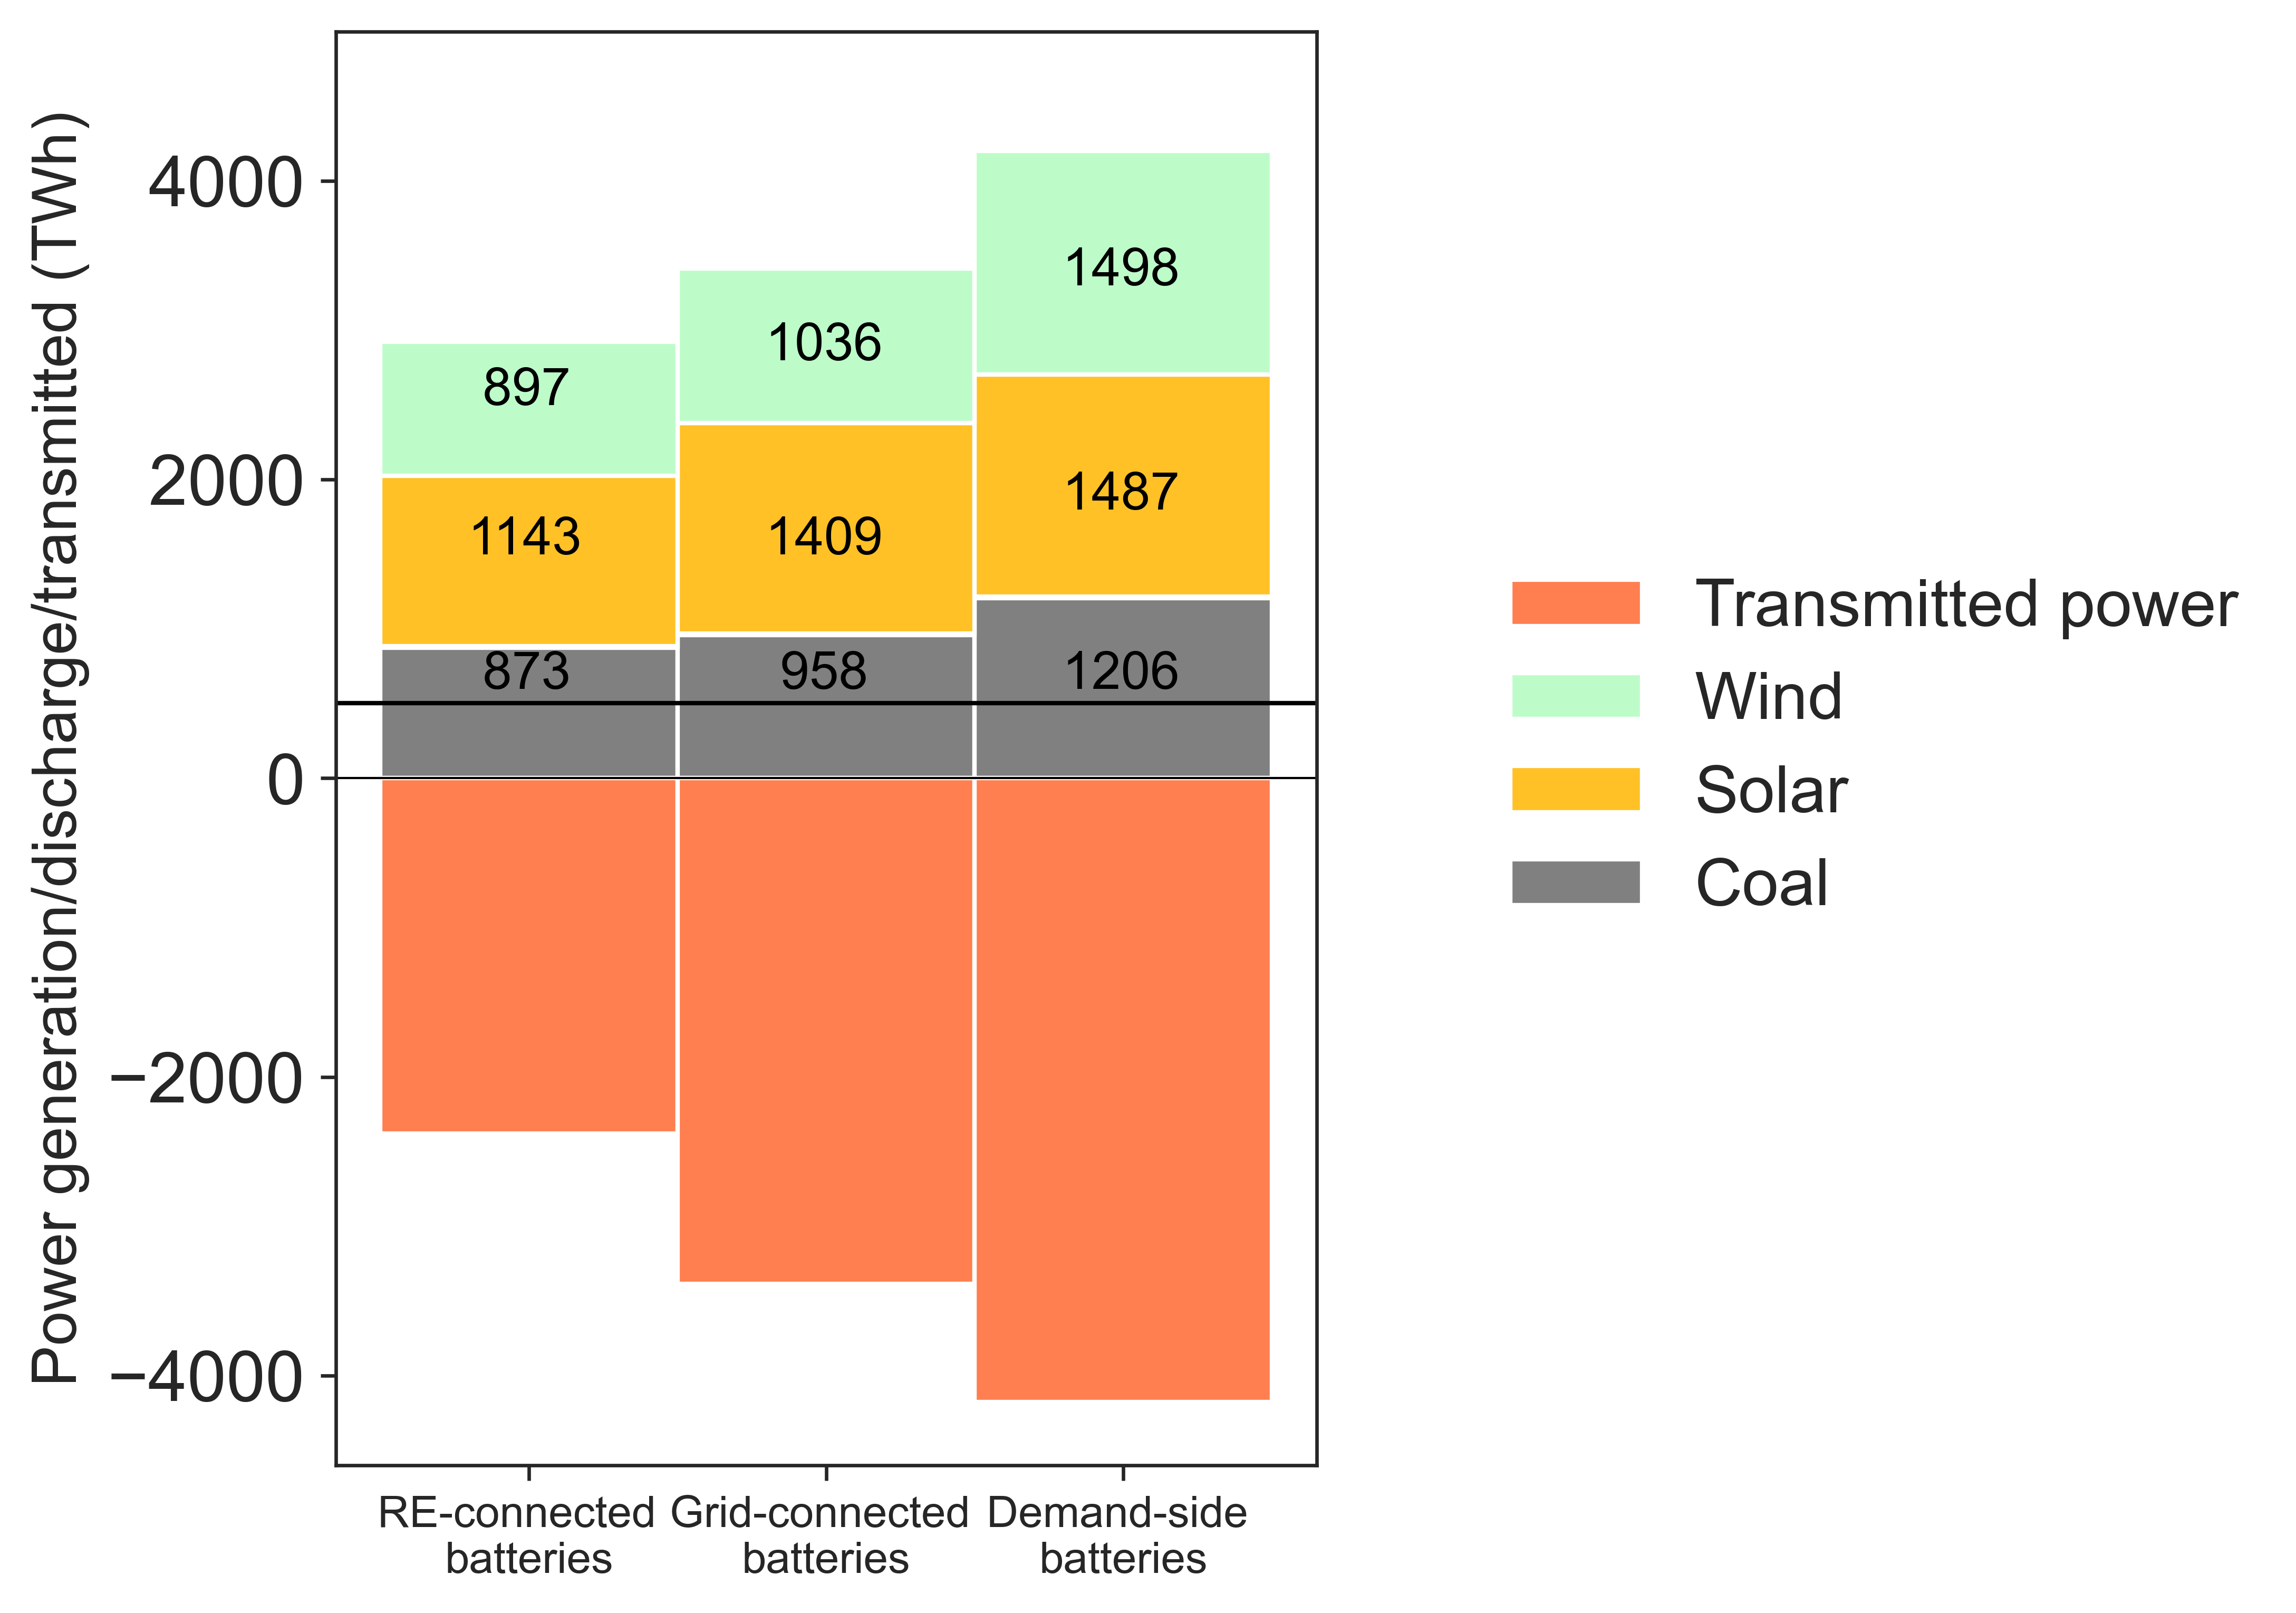

In [44]:
colors = ['k','grey', 'peachpuff', 'pink', 'chocolate', 'deepskyblue', 'gold','mediumseagreen','purple']
labels = ['Coal', 'Coal_CCS','Gas', 'Gas_CCS','Nuclear','Hydro','Solar','Wind','Batteries']
r = [0,1,2]
Scen = ['RE-connected  \nbatteries', 'Grid-connected \nbatteries',  'Demand-side \nbatteries']

gencap = filled_power.values

Coal = [gencap[0,1]-20, gencap[0,0], gencap[0,2]]
Nuclear = [gencap[4,1], gencap[4,0], gencap[4,2]]
Hydro = [gencap[5,1], gencap[5,0], gencap[5,2]]
Solar = [gencap[6,1], gencap[6,0], gencap[6,2]]
Wind = [gencap[7,1], gencap[7,0], gencap[7,2]]
Transmitted_power = [-2378, -3385, -4177] # 2040


barWidth = 1
bars_nuclear = np.add(Coal, Nuclear).tolist ()
bars_hydro = np.add(bars_nuclear, Hydro).tolist ()
bars_solar = np.add(bars_hydro, Solar).tolist ()
bars_wind = np.add(bars_solar, Wind).tolist ()
bars_storage = np.add(bars_wind, Storage).tolist ()
bars_trans = np.add(bars_storage, Transmitted_power).tolist ()


fig = plt.figure(figsize=(4, 6), dpi=600)
plt.bar(r, Coal, color='grey', edgecolor='white', width=barWidth, label = 'Coal')
plt.bar(r, Solar, bottom=bars_hydro, color='#FFC125', edgecolor='white', width=barWidth, label = 'Solar')
plt.bar(r, Wind, bottom=bars_solar, color='#BDFCC9', edgecolor='white', width=barWidth, label = 'Wind')
# plt.bar(r, Storage, bottom=bars_wind, color='blueviolet', edgecolor='white', width=barWidth, label = 'Battery discharge')
plt.bar(r, Transmitted_power, color='#FF7F50', edgecolor='white', width=barWidth, label = 'Transmitted power')


plt.yticks(fontname = 'Arial', size =16 )
plt.xticks (r, Scen, fontname = 'Arial', size =10)
plt.ylim(-4600, 5000)


current_handles, current_labels = plt.gca().get_legend_handles_labels()
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))
plt.legend (reversed_handles, reversed_labels, frameon=False, bbox_to_anchor=(2, 0.5),loc = 'right', ncol=1, fontsize= 15) 
plt.ylabel('Dispatched electricity(TWh)', size = 14, fontname = 'Arial') 

plt.text(-0.5, 600, '{:10.0f}'.format(gencap[0,1]), fontsize=12, color='black')
plt.text(-0.5, 1500, '{:10.0f}'.format(gencap[6,1]), fontsize=12, color='black')
plt.text(-0.5, 2500, '{:10.0f}'.format(gencap[7,1]), fontsize=12, color='black')


plt.text(0.5, 600, '{:10.0f}'.format(gencap[0,0]), fontsize=12, color='black')
plt.text(0.5, 1500, '{:10.0f}'.format(gencap[6,0]), fontsize=12, color='black')
plt.text(0.5, 2800, '{:10.0f}'.format(gencap[7,0]), fontsize=12, color='black')


plt.text(1.5, 600, '{:10.0f}'.format(gencap[0,2]), fontsize=12, color='black')
plt.text(1.5, 1800, '{:10.0f}'.format(gencap[6,2]), fontsize=12, color='black')
plt.text(1.5, 3300, '{:10.0f}'.format(gencap[7,2]), fontsize=12, color='black')

plt.axhline(y = 502, color = 'black',lw=0.5)  #2040
